In [1]:
import pandas as pd
data=pd.read_csv('customer.csv',encoding='gbk')
data

,ID,性别,年龄,年收入,消费度（1-100）
0,1,男,19,15,39
1,2,男,21,15,81
2,3,女,20,16,6
3,4,女,23,16,77
4,5,女,31,17,40
...,...,...,...,...,...
195,196,女,35,120,79
196,197,女,45,126,28
197,198,男,32,126,74
198,199,男,32,137,18


In [2]:
from sklearn.preprocessing import MinMaxScaler #导入缩放模块
scaler = MinMaxScaler()#实例化
scale = scaler.fit_transform(data[['年龄','年收入','消费度（1-100）']])#对收入和消费度标准化
sale = pd.DataFrame(scale, columns = ['年龄','年收入','消费度（1-100）'])
sale.head(5)

,年龄,年收入,消费度（1-100）
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)#三维降维成二维
principalComponents = pca.fit_transform(sale)
pca_df = pd.DataFrame(data = principalComponents
             , columns = ['主成分 1', '主成分 2'])
pca_df.head()#仅显示前五个

,主成分 1,主成分 2
0,-0.192221,0.319683
1,-0.458175,-0.018152
2,0.052562,0.551854
3,-0.402357,-0.014239
4,-0.031648,0.155578


In [4]:
import sklearn.cluster as cluster
# 寻找 K 的最优值。使用肘法寻找最佳聚类数
K=range(2,12)#相当于遍历每一种情况
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)# n_clusters参数表示聚类中心个数为k
    kmeans=kmeans.fit(pca_df) # 拟合
    wss_iter = kmeans.inertia_ # k越大inertia越小
    wss.append(wss_iter) #放到列表中

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


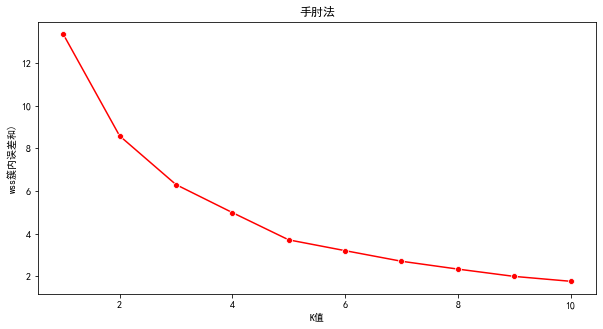

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wss,marker='o',color='red')#绘制线性图
plt.xlabel('K值')
plt.ylabel('wss簇内误差和)')
plt.title('手肘法')
plt.savefig('./kmeans.jpg', dpi=500, bbox_inches='tight') # 清晰保存

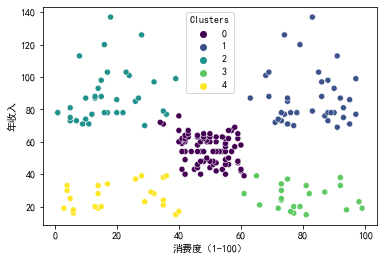

In [7]:
import seaborn as sns
kmeans = cluster.KMeans(n_clusters=5 ,init="k-means++")# 使用k-means++
kmeans = kmeans.fit(data[['年收入','消费度（1-100）']])

data['Clusters'] = kmeans.labels_

sns.scatterplot(x="消费度（1-100）", y="年收入",hue = 'Clusters',  data=data,palette='viridis')
plt.savefig('./kmeans2.jpg', dpi=500, bbox_inches='tight') # 清晰保存